In [4]:
import numpy as np
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler

mfcc = pd.read_csv('mfcc_not_scaled.csv', index_col = 0, header = [0,1,2])

#mfcc = mfcc.drop(mfcc.columns[[12,13,14,15,16,17,18,19,32,33,34,35,36,37,38,39,52,53,54,55,56,57,58,59,72,73,74,75,76,77,78,79,92,93,94,95,96,97,98,99,112,113,114,115,116,117,118,119,132,133,134,135,136,137,138,139]], axis=1)


chroma = pd.read_csv('chroma_not_scaled.csv', index_col = 0, header = [0,1,2])
zcr = pd.read_csv('zcr_not_scaled.csv', index_col = 0, header = [0,1])
centroid_rolloff = pd.read_csv('centroid_rolloff_bandwidth_not_scaled.csv', index_col = 0, header = [0,1])
contrast = pd.read_csv('contrast_not_scaled.csv', index_col = 0, header = [0,1,2])

#pitch_changes = pd.read_csv('pitch_changes.csv', index_col = 0, header = [0])

unscaled_df = mfcc.join([chroma, zcr, centroid_rolloff, contrast])
unscaled_df = unscaled_df.dropna()

ipd.display(unscaled_df)


unscaled_df.to_csv('complete_unscaled_dataset.csv')

,"(mfcc, mean, 1)","(mfcc, mean, 2)","(mfcc, mean, 3)","(mfcc, mean, 4)","(mfcc, mean, 5)","(mfcc, mean, 6)","(mfcc, mean, 7)","(mfcc, mean, 8)","(mfcc, mean, 9)","(mfcc, mean, 10)",...,"(contrast, skew, 3)","(contrast, skew, 4)","(contrast, skew, 5)","(contrast, skew, 6)","(contrast, kurtosis, 1)","(contrast, kurtosis, 2)","(contrast, kurtosis, 3)","(contrast, kurtosis, 4)","(contrast, kurtosis, 5)","(contrast, kurtosis, 6)"
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.643892,-1.232145,-0.298110,-0.949567,-0.462216,0.159492,-0.003322,0.179328,-0.272375,-0.166579,...,-0.448939,-0.029435,0.090195,0.582754,1.246656,-0.232739,-0.428676,0.028733,-0.003168,0.018854
5,0.270488,-0.643528,0.581130,-0.176472,-0.276552,0.432165,-0.408263,1.532433,-0.283644,-0.324987,...,-1.121583,-0.636879,-0.181506,0.884934,-0.418297,0.540123,-0.432320,0.493790,0.043739,1.114180
10,1.121521,-0.451553,-1.759735,0.355386,-0.561454,-0.560480,-0.035916,-0.129908,-0.155199,-0.245175,...,-0.180978,0.001738,-0.028454,-0.095523,1.138346,0.095012,-0.089139,0.587628,1.330172,0.196729
140,-1.367652,-0.262616,1.516007,0.563424,1.878015,0.327490,1.379521,0.195044,0.647752,0.638997,...,-0.143601,0.664160,0.302908,0.907876,0.554784,-0.328119,-0.057213,0.789910,-0.041208,0.415244
141,-0.700861,0.139932,0.046463,-0.055100,0.571697,-1.159243,1.047132,-1.012609,0.547770,-0.012894,...,-1.518500,-1.248451,-0.578213,1.209552,-1.082865,-0.367900,-0.289165,-0.059534,-0.538509,0.615283


In [10]:
import numpy as np
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = pd.read_csv('complete_unscaled_dataset2.csv', index_col = 0, header = [0])

tracks_genres = pd.read_csv('tracks_genres_mio2.csv', index_col = 0, header = [0])
#Alcune tracce presenti in tracks_genres.csv potrebbero non funzionare, quindi tengo solo le tracce di cui sono riuscito ad estrarre le feature
y = tracks_genres.loc[X.index,  'genre']

#Divido training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#X = pd.DataFrame(data=scaled, index = unscaled_df.index, columns = unscaled_df.columns )
#X.index.name = 'track_id'

#Fit e scaling sul training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Oversampling dei dati di training
#SMOTE resampling
from imblearn.over_sampling import SMOTE, ADASYN
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train)

#Oversampling dei dati di training
#SVM SMOTE resampling
#from imblearn.over_sampling import SVMSMOTE
#X_train_resampled, y_train_resampled = SVMSMOTE().fit_resample(X_train_scaled, y_train)

#SMOTE ENN (smote + pulizia)
#from imblearn.combine import SMOTEENN
#smote_enn = SMOTEENN(random_state=42)
#X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

In [11]:
from sklearn.linear_model import LogisticRegression
import joblib

clf = LogisticRegression(random_state=0, max_iter = 2000).fit(X_train_resampled, y_train_resampled)

joblib.dump(scaler, "Scaler.joblib")
joblib.dump(clf, "LRClassifier.joblib")

['LRClassifier.joblib']

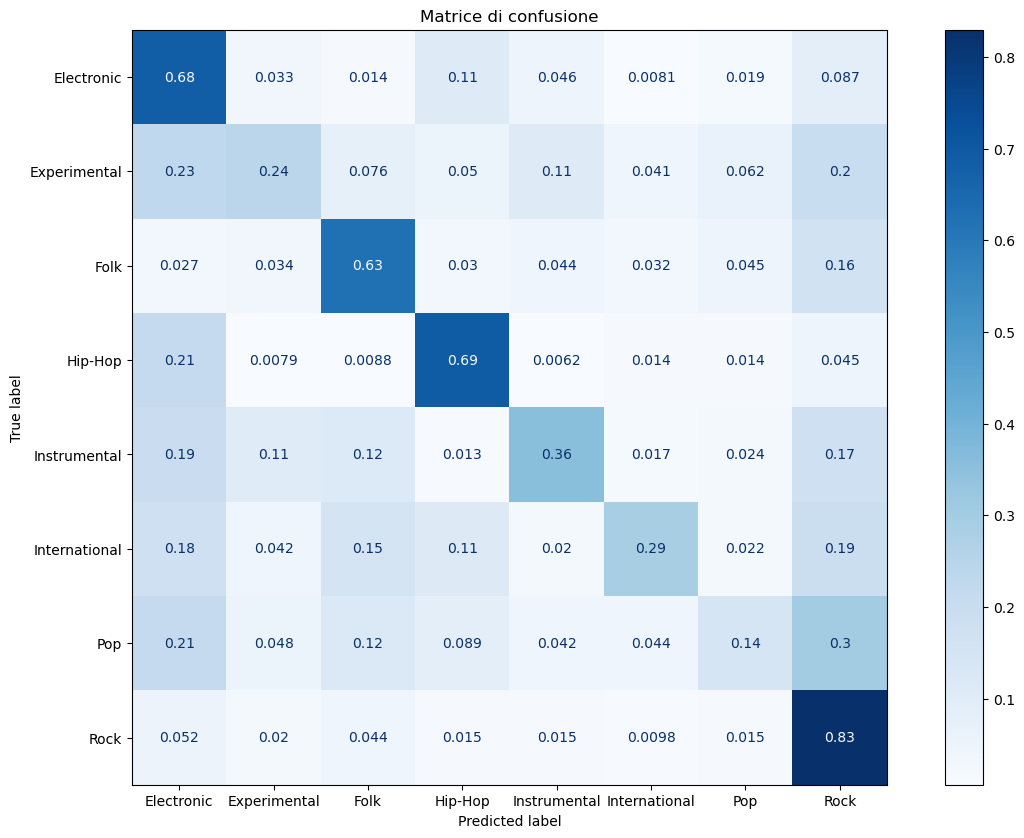

               precision    recall  f1-score   support

   Electronic       0.61      0.68      0.64      2104
 Experimental       0.38      0.24      0.30       739
         Folk       0.56      0.63      0.59       915
      Hip-Hop       0.63      0.69      0.66      1136
 Instrumental       0.46      0.36      0.40       718
International       0.45      0.29      0.35       457
          Pop       0.35      0.14      0.20       765
         Rock       0.67      0.83      0.74      2337

     accuracy                           0.59      9171
    macro avg       0.51      0.48      0.49      9171
 weighted avg       0.56      0.59      0.57      9171

Accuracy:  0.5900119943299531

Numero di tracce assegnate ad ogni classe: 
 [['Electronic' 2380]
 ['Experimental' 466]
 ['Folk' 1017]
 ['Hip-Hop' 1241]
 ['Instrumental' 554]
 ['International' 292]
 ['Pop' 314]
 ['Rock' 2907]]


In [12]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

#Scaling sul test set
scaler = joblib.load("Scaler.joblib") 
X_test_scaled = scaler.transform(X_test)


# Predict the test set
predictions = clf.predict(X_test_scaled)
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test_scaled, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Matrice di confusione')
plt.show(matrix)

print(classification_report(y_test, predictions))


print("Accuracy: ", accuracy_score(y_test, predictions))

(unique, counts) = np.unique(predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print("\nNumero di tracce assegnate ad ogni classe: \n", frequencies)